In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(11)

# Create random test data with normal distribution

In [2]:
means = [[2, 2], [8, 3], [3, 6]] # 3 clusters shape (3, 2)
cov = [[1, 0], [0, 1]] # 2x2 covariance matrix
N = 500 # number of samples per cluster
X0 = np.random.multivariate_normal(means[0], cov, N) # generate samples for cluster 0
X1 = np.random.multivariate_normal(means[1], cov, N) # generate samples for cluster 1
X2 = np.random.multivariate_normal(means[2], cov, N) # generate samples for cluster 2

X = np.concatenate((X0, X1, X2), axis = 0) # shape (1500, 2)
K = 3 # number of clusters

original_label = np.asarray([0]*N + [1]*N + [2]*N).T # shape (1500,)

# Visualizaion the test data

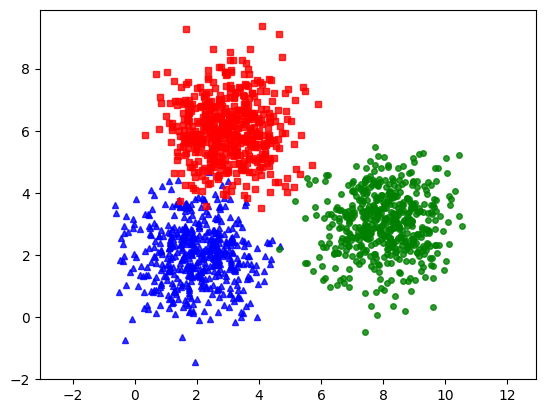

In [3]:
def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)

    plt.axis('equal')
    plt.plot()
    plt.show()
    
kmeans_display(X, original_label)

# Some neccessary method of K-means clustering

In [4]:
def kmeans_init_centers(X: np.ndarray, k: int) -> np.ndarray:
    """
    Randomly initialize k centers from the dataset X.

    Parameters
    ----------
    X : np.ndarray
        The dataset from which to initialize the centers.
        
    k : int
        The number of centers to initialize.
        
    Returns
    -------
    np.ndarray
        The initialized centers.     
    """
    # randomly pick k rows of X as initial centers
    return X[np.random.choice(X.shape[0], k, replace=False)]

def kmeans_assign_labels(X, centers):
    # calculate pairwise distances btw data and centers
    D = cdist(X, centers)
    # return index of the closest center
    return np.argmin(D, axis = 1)

def kmeans_update_centers(X, labels, K):
    centers = np.zeros((K, X.shape[1]))
    for k in range(K):
        # collect all points assigned to the k-th cluster 
        Xk = X[labels == k, :]
        # take average
        centers[k,:] = np.mean(Xk, axis = 0)
    return centers

def has_converged(centers, new_centers):
    # return True if two sets of centers are the same
    return (set([tuple(a) for a in centers]) == 
        set([tuple(a) for a in new_centers]))

# K-means clustering method

In [5]:
def kmeans(X, K):
    centers = [kmeans_init_centers(X, K)]
    labels = []
    it = 0 
    while True:
        labels.append(kmeans_assign_labels(X, centers[-1]))
        new_centers = kmeans_update_centers(X, labels[-1], K)
        if has_converged(centers[-1], new_centers):
            break
        centers.append(new_centers)
        it += 1
    return (centers, labels, it)

# Result of the K-means clustering algorithm on test data

Centers found by our algorithm:
[[2.99084705 6.04196062]
 [1.97563391 2.01568065]
 [8.03643517 3.02468432]]


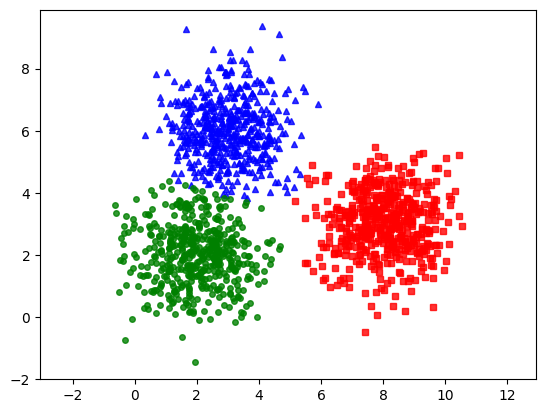

In [6]:
(centers, labels, it) = kmeans(X, K)
print('Centers found by our algorithm:')
print(centers[-1])

kmeans_display(X, labels[-1])

# Compare with KMeans from scikit_learn

Centers found by scikit-learn:
[[1.97826939 2.00223913]
 [2.98759958 6.02896527]
 [8.0410628  3.02094748]]


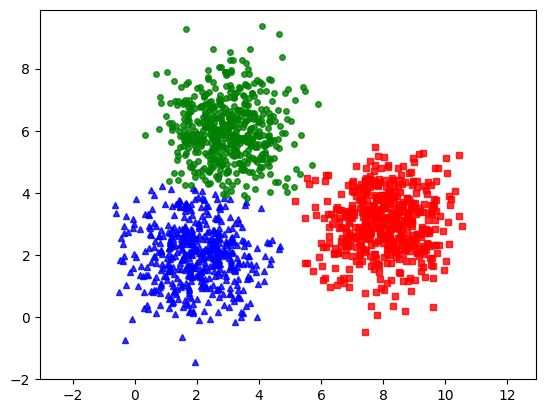

In [7]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
print('Centers found by scikit-learn:')
print(kmeans.cluster_centers_)
pred_label = kmeans.predict(X)
kmeans_display(X, pred_label)

Centers found by scikit-learn:
[[1.97563391 2.01568065]
 [8.0410628  3.02094748]
 [2.99634182 6.03964618]]


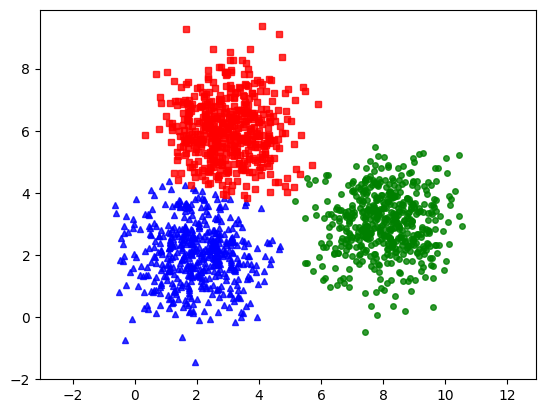

In [8]:
from k_means_clustering import KMeansClustering
kmeans = KMeansClustering(n_clusters=3).fit(X)
print('Centers found by scikit-learn:')
print(kmeans.cluster_centers_)
pred_label = kmeans.predict(X)
kmeans_display(X, pred_label)